## Weight initialization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DATASETS/ushape.csv")
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


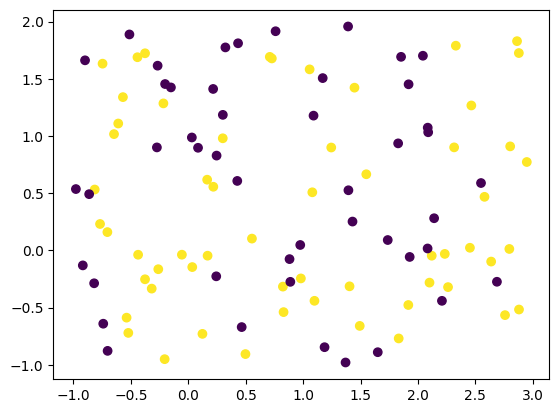

In [3]:
plt.scatter(df['X'], df['Y'], c=df['class'])
plt.show()

In [4]:
X = df.iloc[:,0:2].values
Y = df.iloc[:,-1].values

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.get_weights()

[array([[ 1.0821689 ,  1.4180225 ,  0.9377661 , -0.25878498,  0.4602239 ,
          1.1760023 , -0.80375475,  0.3911619 , -1.4849938 ,  0.42034563],
        [ 0.20899735,  0.18495601,  0.7990779 , -0.2477902 , -0.24239355,
          0.19779195,  1.601384  , -0.75380105, -0.24282885, -0.31050426]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.1691388 ,  0.63361317, -0.7073449 ,  0.14398563,  0.19251499,
          0.7137399 ,  0.2347074 , -0.1352983 ,  0.18310952,  0.833565  ],
        [ 0.43471688, -0.48520488, -0.3909197 , -0.23450722, -0.505983  ,
          0.07602949, -0.2878724 , -0.05184155, -0.5282342 ,  0.2314148 ],
        [-0.47780272,  0.13703872,  0.52300566,  0.06651355, -0.04288627,
          0.4406477 ,  0.38749152, -0.01653378,  0.37204158, -0.31579456],
        [ 0.52309203,  0.76053756,  0.03324904, -0.42193687, -0.949606  ,
         -0.31323165,  0.29549074,  0.17264171,  0.73708797,  0.01984415],
        [ 0.43808

In [10]:
initial_weights = model.get_weights()

initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

model.set_weights(initial_weights)

model.get_weights()

[array([[ 0.1662554 , -0.7650198 , -0.56652904, -1.4326216 ,  0.15102613,
         -0.1841399 , -0.12116736, -0.3808384 , -1.2065147 , -0.18302394],
        [-0.44107187,  0.14231017, -0.87444943, -1.7663305 ,  1.6496873 ,
         -1.1522396 ,  0.3803649 ,  0.44786602,  1.2012109 ,  0.3389203 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.23787372, -0.1705046 , -0.00872547,  0.07276379,  0.2335936 ,
         -0.02189348,  0.2184795 ,  0.12475476, -0.11256634, -0.49500617],
        [-0.2646617 , -0.50943935,  0.04512149,  0.10603551,  0.0939192 ,
          0.49503285,  0.16086777, -0.21398094,  0.26418895,  0.45039442],
        [-0.15311536, -0.06748219, -0.4805155 , -0.35828274,  0.13917886,
         -0.3622232 ,  0.39584175,  0.44258508,  0.3685404 , -0.74375683],
        [-0.13128586,  0.59771585,  0.26141602,  0.0268168 ,  0.19594344,
         -0.04396145, -0.39098108, -0.11313282,  0.34413075,  0.43984127],
        [-0.21104

In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history = model.fit(X,Y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.4643 - loss: 0.6953 - val_accuracy: 0.3810 - val_loss: 0.6983
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5357 - loss: 0.6944 - val_accuracy: 0.3810 - val_loss: 0.6985
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5476 - loss: 0.6937 - val_accuracy: 0.3810 - val_loss: 0.6986
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5714 - loss: 0.6933 - val_accuracy: 0.3810 - val_loss: 0.6986
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5952 - loss: 0.6928 - val_accuracy: 0.3810 - val_loss: 0.6987
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5833 - loss: 0.6922 - val_accuracy: 0.3810 - val_loss: 0.6987
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5952 - loss: 0.6918 - val_accuracy: 0.4762 - val_loss: 0.6988
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5952 - loss: 0.6913 - val_accuracy: 0.4762 - val_loss

In [14]:
model.get_weights()

[array([[ 0.16770212, -0.76886827, -0.59103626, -1.2542356 ,  0.26906174,
         -0.21078496, -0.15349904, -0.46269056, -1.244803  , -0.25758606],
        [-0.35901636,  0.12318691, -0.7867925 , -1.8961868 ,  1.6978832 ,
         -1.2646722 ,  0.39958185,  0.5344924 ,  1.1566774 ,  0.26373968]],
       dtype=float32),
 array([ 0.1087563 ,  0.00520899, -0.02361808, -0.15288354,  0.1120616 ,
         0.00691564, -0.00860729, -0.02761488,  0.16441536,  0.275905  ],
       dtype=float32),
 array([[ 0.23095895, -0.0142202 , -0.00872547,  0.14549978,  0.25385305,
          0.00115931,  0.24500553,  0.14901012, -0.00411944, -0.33785665],
        [-0.2646617 , -0.51762706,  0.04512149,  0.15534507,  0.03875845,
          0.4712785 ,  0.3137591 , -0.150988  ,  0.19326146,  0.5022766 ],
        [-0.11620107, -0.05115055, -0.4805155 , -0.3906763 ,  0.17448448,
         -0.31353205,  0.5341541 ,  0.50308263,  0.3471509 , -0.6000352 ],
        [-0.13503669,  0.6092599 ,  0.26141602, -0.02234422, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 688us/step


<Axes: >

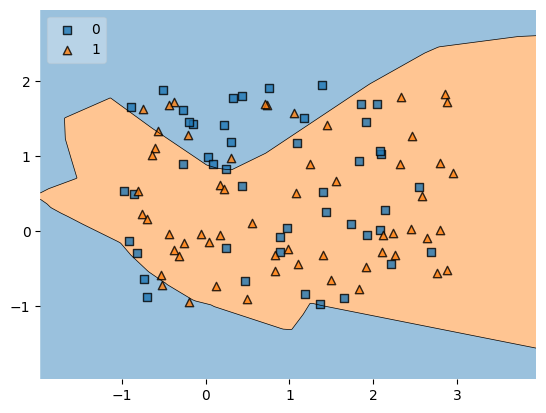

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y.astype('int'), clf=model, legend=2)

In [17]:
(np.random.randn(10,10)*0.01).min()

np.float64(-0.025593532359546575)

In [18]:
(np.random.randn(10,10)*0.01).max()

np.float64(0.02085588029372271)